# 1. Título: Demonstrativos de Acidentes - Rodovia RioSP

# 2. Membros (nome e número de matrícula)



*   Ana Luísa Pinto Dalmacio Demaria - 2019025897
*   Bárbara Santiago de Mendonça - 2019025951
*   Matheus Oliveira Ramos - 2019026460
*   Raul Rocha Otaviano - 2019026567  

# 3. Descrição dos dados (qual a URL? qual o domínio? como os dados foram processados?)

O conjunto de dados escolhido se refere a [Informações das Concessionárias de Rodovias Federais Concedidas](https://dados.gov.br/dados/conjuntos-dados/acidentes-rodovias). Os dados sobre os acidentes nas rodovias concedidas são transmitidos pelas concessionárias e salvos na rede da Superintendência, sob organização da Agência Nacional de Transportes Terrestres.  O dataset é chamado “Demonstrativos de Acidentes” e, especificamente para esse trabalho, o banco escolhido foi o da rodovia RIOSP, uma vez que ele foi criado em 2023 e possui a maior quantidade de instâncias em comparação com os demais bancos atualizados neste ano (ECORIOMINAS e VIABRASIL). O dicionário dos dados pode ser encontrado no seguinte [link](https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/47b96524-3bf9-47ef-b7a6-2d02c39d72ac/download/demostrativo_acidentes_dicionario_dados.pdf).

Nesse contexto, inicialmente foi baixado o arquivo .csv diretamentente do site do Governo Federal. Esse arquivo foi, então, transformado em .xlsx e pequenos ajustes foram realizados nesse momento - por exemplo, na coluna *Sentido*, no banco original, foram usados dois termos para representar a mesma ideia: "Norte" e "Pista Norte". Para possibilitar que as consultas tivessem resultados mais realísticos, os termos foram unificados em apenas "Norte". Outro ajuste realizado se refere a coluna *km*, que possuia valores com quantidades muito variadas de casas decimais. Para padronizar esses números, optou-se por realizar um arredondamento com duas casas decimais nessa coluna.

Em seguida, partindo de um modelo relacional previamente normalizado, as tabelas das entidades foram organizadas no próprio excel e colunas extras foram acrescentadas nessas relações, a citar: (i) Rodas, na tabela veiculos; (ii) Descricao, na tabela envolvidos; e (iii) Estado, na tabela local. A partir das tabelas das entidades, as tabelas dos relacionamentos foram elaboradas em python, a partir do [seguinte código](https://colab.research.google.com/drive/1mhm7iFu4TGz_6s7B176kNA33F6Q3ANjL?usp=sharing), para então também serem salvas em excel.

Com as tabelas preparadas, os dados foram transformados em um BD por meio da biblioteca sqlite3 e [desse script](https://colab.research.google.com/drive/1v5O5zhVh_YvKqcqTsI1H8FhHxbX8stEX?usp=sharing). Finalmente, o arquivo .db foi transformado em .sql e foram acrescentadas as restrições relativas a nulos, chaves primárias e chaves estrangeiras.

Nesse sentido, a partir do arquivo inicial, foram estabeleceu-se 4 entidades e 3 relacionamentos, sendo eles:

**Entidades**

> 1.   **ocorrencias:** na qual estão registrados o tipo da ocorrência (com/sem vítima), o tipo do acidente (queda de moto, engavetamento, colisão traseira etc), o número de controle da ocorrência pela concessionária, além da data e do horário da ocorrência. Foi transformado em uma tabela;
2.   **veiculos:** os tipos veiculares que podem estar envolvidos em uma ocorrência (automóvel, moto, bicicleta etc) e a informação acrescentada a respeito da quantidade de rodas. Foi transformado em uma tabela;
3.   **local:** os locais nos quais aconteceram ocorrências, definidos por seu KM, trecho da rodovia e o estado do trecho, sendo o último atributo calculado a partir das informações do trecho. Foi transformado em uma tabela;
4.    **envolvidos:** as possíveis consequências do acidente para as pessoas envolvidas em uma ocorrência (ileso, levemente ferido, morto etc) e a informação acrescentada a respeito da descrição do que se configura cada tipo. Foi transformado em uma tabela;

**Relacionamentos**

> 5.   **local_ocorrencia:** a entidade "Local" tem uma cardinalidade de um para muitos com a entidade "Ocorrência", ou seja, um local pode ser associado a mais de uma ocorrência, mas cada ocorrência tem apenas um local. Além disso, informa o sentido em que aconteceu a ocorrência (Norte/Sul). No ajuste para o modelo relacional, as informações relativas a esse relacionamento foram acrescentadas em duas colunas da tabela ocorrencias.
6.  **veiculos_ocorrencia:** a entidade "Veículos" tem uma cardinalidade de muitos para muitos com a entidade "Ocorrência", ou seja, um veículo pode estar associado a mais de uma ocorrência, e cada ocorrência pode estar relacionada a vários veículos. Além disso, informa a quantidade daquele tipo de veículo envolvido no fato. Foi transformado em uma tabela;  
7.  **envolvidos_ocorrencia:** a entidade "Envolvidos" tem uma cardinalidade de muitos para muitos com a entidade "Ocorrência", ou seja, uma instância da entidade "Envolvidos" pode estar associada a mais de uma ocorrência, e cada ocorrência pode estar relacionada a vários envolvidos. Além disso, informa a quantidade de pessoas que ficaram em tal situação para aquela ocorrência. Foi transformado em uma tabela; 







 O arquivo SQL está disponível no googledrive, como identificado no código abaixo, que carrega os dados no notebook.

In [ ]:
import io
import sqlite3
import pandas as pd

https://drive.google.com/file/d/109V4xNBmVz2fl6dinD8cZcIxLKO9RuQP/view?usp=sharing

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=109V4xNBmVz2fl6dinD8cZcIxLKO9RuQP' -O demonstrativos_acidentes_riosp.sql

--2023-06-08 15:15:21--  https://docs.google.com/uc?export=download&id=109V4xNBmVz2fl6dinD8cZcIxLKO9RuQP
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5csl9tiqprck0gqu7e7cjlrij58afqsh/1686237300000/06719093553921267762/*/109V4xNBmVz2fl6dinD8cZcIxLKO9RuQP?e=download&uuid=acd13b26-6931-4b15-9eba-0d0405739166 [following]
--2023-06-08 15:15:22--  https://doc-0k-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5csl9tiqprck0gqu7e7cjlrij58afqsh/1686237300000/06719093553921267762/*/109V4xNBmVz2fl6dinD8cZcIxLKO9RuQP?e=download&uuid=acd13b26-6931-4b15-9eba-0d0405739166
Resolving doc-0k-60-docs.googleusercontent.com (doc-0k-60-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:

In [ ]:
conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open('demonstrativos_acidentes_riosp.sql', 'r', encoding='utf-8')
sql = f.read()
cursor.executescript(sql)

# 4. Diagrama ER

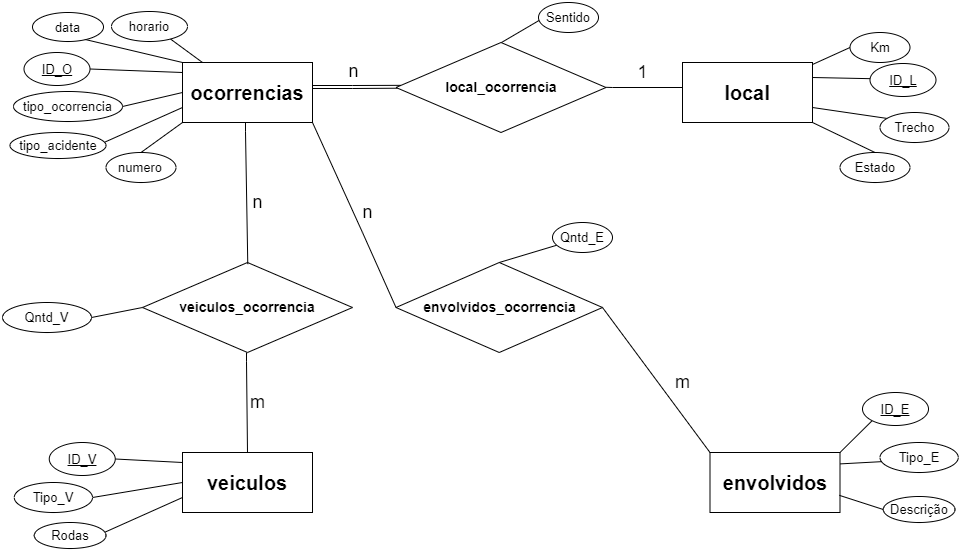

# 5. Diagrama relacional

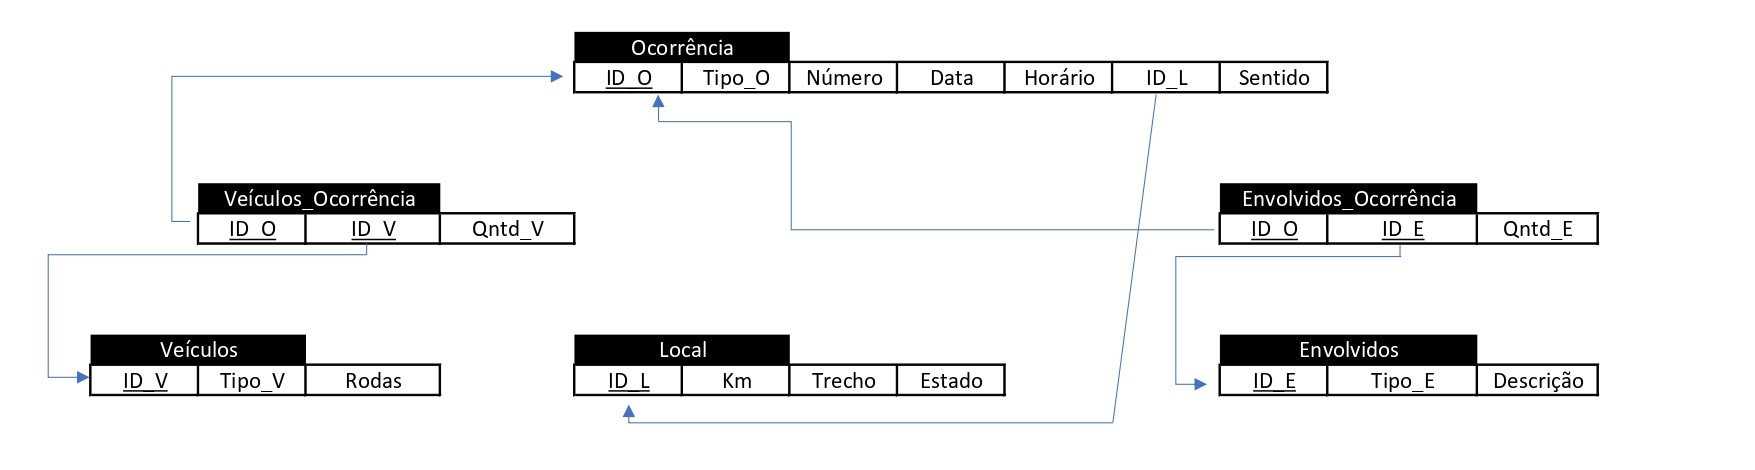

# 6. Consultas

## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)
Identificar os horários em que ocorrem mais acidentes:

In [ ]:
query_1_1 = """
SELECT Horario, COUNT(*) AS Quantidade_Acidentes
FROM ocorrencias
GROUP BY Horario
ORDER BY Quantidade_Acidentes DESC
LIMIT 2 ;
"""

df_1_1 = pd.read_sql_query(query_1_1, conn)
df_1_1

,Horario,Quantidade_Acidentes
0,18:15:00.000000,19
1,17:39:00.000000,19


In [ ]:
%%timeit
df = pd.read_sql_query(query_1_1, conn)

4.89 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_1_2 = """
SELECT Horario, Quantidade_Acidentes
FROM (
    SELECT Horario, COUNT(*) AS Quantidade_Acidentes
    FROM ocorrencias
    GROUP BY Horario
) AS Subquery
WHERE Quantidade_Acidentes = (
    SELECT MAX(Quantidade_Acidentes)
    FROM (
        SELECT Horario, COUNT(*) AS Quantidade_Acidentes
        FROM ocorrencias
        GROUP BY Horario
    ) AS InnerSubquery 
);
"""

df_1_2 = pd.read_sql_query(query_1_2, conn)
df_1_2

,Horario,Quantidade_Acidentes
0,17:39:00.000000,19
1,18:15:00.000000,19


In [ ]:
%%timeit
df = pd.read_sql_query(query_1_2, conn)

16.5 ms ± 6.68 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 1:

Diferentemente do que o grupo imaginava, que seria de madrugada, os horários com maior quantidade de acidentes se encontram entre 17:30 e 18:30, ou seja, no final da tarde. Tal fato pode ser explicado por esse ser um horário de pico. Assim, é provável que a quantidade de veículos na estrada seja maior, o que, por sua vez, resulta em mais acidentes.

### 6.1.2 Consulta 2 (duas versões)
Identificar o estado que teve o maior número de colisões traseiras:

In [ ]:
query_2_1 = """
SELECT l.Estado, COUNT(*) AS Quantidade
FROM ocorrencias o
JOIN local l ON o.ID_L = l.ID_L
WHERE o.Tipo_de_acidente = 'colisão traseira'
GROUP BY l.Estado;
"""


df_2_1 = pd.read_sql_query(query_2_1, conn)
df_2_1

,Estado,Quantidade
0,RJ,909
1,SP,1712


In [ ]:
%%timeit
df = pd.read_sql_query(query_2_1, conn)

2.55 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_2_2 = """
SELECT l.Estado, COUNT(*) AS Quantidade
FROM local l
JOIN (
    SELECT o.ID_L
    FROM ocorrencias o
    WHERE o.Tipo_de_acidente = 'colisão traseira'
) sub ON l.ID_L = sub.ID_L
GROUP BY l.Estado;
"""


df_2_2 = pd.read_sql_query(query_2_2, conn)
df_2_2

,Estado,Quantidade
0,RJ,909
1,SP,1712


In [ ]:
%%timeit
df = pd.read_sql_query(query_2_2, conn)

3.98 ms ± 521 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 2:

O resultado revelou que a maior parte dos acidentes de colisão traseira ocorreram no estado de São Paulo, que concentra cerca de 65% das ocorrências desse tipo na Rodovia RioSP. Isso pode ser justificado pela maior distância pertencente a este estado, enquanto o RJ tem uma fração menor da rodovia.

## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)
Identificar os trechos de rodovias com maior incidência de acidentes, com trecho e faixa quilométrica:

Obs: Limitado aos 20 primeiros resultados

In [ ]:
query_3_1 = """
SELECT local.Trecho, local.km, COUNT(*) AS Total_Acidentes
FROM ocorrencias
JOIN local ON ocorrencias.ID_L =  local.ID_L
GROUP BY local.Trecho, local.km
ORDER BY Total_Acidentes DESC
LIMIT 20;
"""

df_3_1 = pd.read_sql_query(query_3_1, conn)
df_3_1

,Trecho,km,Total_Acidentes
0,BR-116/SP,204.50,38
1,BR-116/SP,229.00,33
2,BR-116/SP,223.00,31
3,BR-116/SP,230.00,31
4,BR-116/SP,227.00,30
5,BR-116/SP,219.00,28
6,BR-116/SP,86.95,25
7,BR-116/SP,165.20,25
8,BR-116/SP,228.00,25
9,BR-116/SP,146.00,24


In [ ]:
%%timeit
df = pd.read_sql_query(query_3_1, conn)

10.7 ms ± 93.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_3_2 = """
SELECT Trecho, km, Total_Acidentes
FROM (
  SELECT local.Trecho, local.km, COUNT(*) AS Total_Acidentes,
        ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS RowNum
  FROM ocorrencias
  JOIN local ON ocorrencias.ID_L =  local.ID_L
  GROUP BY local.Trecho, local.km
) AS Subquery
WHERE RowNum <= 20;
"""

df_3_2 = pd.read_sql_query(query_3_2, conn)
df_3_2

,Trecho,km,Total_Acidentes
0,BR-116/SP,204.50,38
1,BR-116/SP,229.00,33
2,BR-116/SP,223.00,31
3,BR-116/SP,230.00,31
4,BR-116/SP,227.00,30
5,BR-116/SP,219.00,28
6,BR-116/SP,86.95,25
7,BR-116/SP,165.20,25
8,BR-116/SP,228.00,25
9,BR-116/SP,146.00,24


In [ ]:
%%timeit
df = pd.read_sql_query(query_3_2, conn)

15.8 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 3:

Em consonância com o resultado visto anteriormente, essa consulta revelou que a maior parte dos acidentes desta via ocorre no estado de São Paulo. A investigação com relação ao trecho com maior quantidade de ocorrências também mostrou que esse estado domina, com 16 dos 20 primeiros lugares no ranking. RJ apresentou 20%. Além disso, a maior concentração dos acidentes está no intervalo de 200-230 km BR-116/SP com 11 aparições e um total de 299 acidentes, mostrando que existe um trecho da rodovia bastante perigoso.


### 6.2.2 Consulta 4 (duas versões)

Forneça o total de acidentes, agrupados por Estado e sentido, na ordem decrescente da quantidade de acidentes:

In [ ]:
query_4_1 = """
SELECT local.Estado, ocorrencias.Sentido, COUNT(*) AS Total_Acidentes
FROM ocorrencias
JOIN local ON ocorrencias.ID_L =  local.ID_L
GROUP BY local.Estado, ocorrencias.Sentido
ORDER BY Total_Acidentes DESC
;
"""

df_4_1 = pd.read_sql_query(query_4_1, conn)
df_4_1

,Estado,Sentido,Total_Acidentes
0,SP,Sul,2788
1,SP,Norte,2497
2,RJ,Norte,2090
3,RJ,Sul,1788


In [ ]:
%%timeit
df = pd.read_sql_query(query_4_1, conn)

10.1 ms ± 2.59 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_4_2 = """
SELECT local.Estado,  ocorrencias.Sentido, COUNT(*) AS Total_Acidentes
FROM
  ( SELECT
      ocorrencias.ID_L,
      ocorrencias.Sentido
    FROM
      ocorrencias
    ) AS ocorrencias
JOIN local ON ocorrencias.ID_L = local.ID_L
GROUP BY local.Estado, ocorrencias.Sentido
ORDER BY Total_Acidentes DESC;
"""

df_4_2 = pd.read_sql_query(query_4_2, conn)
df_4_2


,Estado,Sentido,Total_Acidentes
0,SP,Sul,2788
1,SP,Norte,2497
2,RJ,Norte,2090
3,RJ,Sul,1788


In [ ]:
%%timeit
df = pd.read_sql_query(query_4_2, conn)

10.4 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 4:

A consulta revelou que os acidentes estão bem distribuídos entre os Estados e sentidos. Como já visto, SP fica com a maior quantidade deles. Entre os Estados, enquanto em São Paulo o sentido Norte vence o sentido Sul, no RJ o resultado é contrário.

### 6.2.3 Consulta 5 (duas versões)
Identificar a quantidade de veículos totais envolvidos nos acidentes, por tipo de veículo:

In [ ]:
query_5_1 = """
SELECT v.Tipo_V, SUM(vo.Qntd_V) AS Qtd_V
FROM veiculos_ocorrencia vo
JOIN veiculos v ON vo.ID_V = v.ID_V
GROUP BY v.Tipo_V
ORDER BY Qtd_V DESC;
"""

df_5_1 = pd.read_sql_query(query_5_1, conn)
df_5_1

,Tipo_V,Qtd_V
0,automovel,9112
1,caminhao,2382
2,moto,1827
3,outros,1466
4,trator_maquinas,631
5,utilitarios,440
6,bicicleta,293
7,onibus,199
8,tracao_animal,21


In [ ]:
%%timeit
df = pd.read_sql_query(query_5_1, conn)

6.26 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_5_2 = """
SELECT v.Tipo_V, (
    SELECT SUM(vo.Qntd_V)
    FROM veiculos_ocorrencia vo
    WHERE vo.ID_V = v.ID_V
) AS Qtd_V
FROM veiculos v
WHERE Qtd_V IS NOT NULL
ORDER BY Qtd_V DESC;
"""

df_5_2 = pd.read_sql_query(query_5_2, conn)
df_5_2

,Tipo_V,Qtd_V
0,automovel,9112
1,caminhao,2382
2,moto,1827
3,outros,1466
4,trator_maquinas,631
5,utilitarios,440
6,bicicleta,293
7,onibus,199
8,tracao_animal,21


In [ ]:
%%timeit
df = pd.read_sql_query(query_5_2, conn)

7.06 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 5:

Conforme o esperado, a consulta comprovou o maior envolvimento de automóveis nos acidentes. Dada a localização da BR-116, o fluxo de automóveis leves é mais relevante, uma vez que não configura, por exemplo, como destino um porto, o que acarretaria um maior fluxo de veículos pesados. De toda forma, como está localizada em um grande polo econômico brasileiro, a movimentação de bens continua sendo relevante, resultando em um grande fluxo de veículos pesados, o que siginifica uma participação relevante deles também.

## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

Retornar o tipo de acidente e a quantidade de mortos correspondente a cada tipo, em ordem decrescente do número de mortos:

In [ ]:
query_6_1 = """
SELECT ocorrencias.Tipo_de_acidente, COUNT(*) AS Quantidade_Mortos
FROM ocorrencias
JOIN envolvidos_ocorrencia ON ocorrencias.ID_O =  envolvidos_ocorrencia.ID_O
JOIN envolvidos ON envolvidos_ocorrencia.ID_E = envolvidos.ID_E
WHERE envolvidos.ID_E = 4
GROUP BY ocorrencias.Tipo_de_acidente
ORDER BY Quantidade_Mortos DESC;
"""

df_6_1 = pd.read_sql_query(query_6_1, conn)
df_6_1

,Tipo_de_acidente,Quantidade_Mortos
0,atropelamento de pedestre atravessando,54
1,atropelamento de pedestre caminhando,40
2,colisão traseira,21
3,queda de moto,12
4,abalroamento longitudinal,10
5,colisão frontal,7
6,engavetamento,6
7,capotamento,6
8,choque em veículo parado na pista,3
9,choque em barreira new jersey,3


In [ ]:
%%timeit
df = pd.read_sql_query(query_6_1, conn)

672 µs ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
query_6_2 = """
SELECT o.Tipo_de_acidente, (
  SELECT COUNT(*)
  FROM ocorrencias o2
  JOIN envolvidos_ocorrencia EO ON o2.ID_O =  EO.ID_O
  JOIN envolvidos e ON e.ID_E = EO.ID_E
  WHERE o2.Tipo_de_acidente = o.Tipo_de_acidente AND e.ID_E = 4
  ) AS Quantidade_Mortos
FROM ocorrencias o
GROUP BY o.Tipo_de_acidente
HAVING Quantidade_Mortos >0
ORDER BY Quantidade_Mortos DESC;
"""

df_6_2 = pd.read_sql_query(query_6_2, conn)
df_6_2

,Tipo_de_acidente,Quantidade_Mortos
0,atropelamento de pedestre atravessando,54
1,atropelamento de pedestre caminhando,40
2,colisão traseira,21
3,queda de moto,12
4,abalroamento longitudinal,10
5,colisão frontal,7
6,engavetamento,6
7,capotamento,6
8,choque em veículo parado na pista,3
9,choque em barreira new jersey,3


In [ ]:
%%timeit
df = pd.read_sql_query(query_6_2, conn)

6.9 ms ± 640 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 6:

Podemos observar que o acidente que mais causa mortes é o atropelamento de pedestres. Em seguida, temos colisões e queda de motos. A maior fatalidade nos casos de atropelamento está provavelmente ligada a fragilidade de uma pessoa diante de um veículo, mesmo que a velocidade deste não seja tão elevada. Estudos da Organização Mundial da Saúde (OMS) apontam que quando um pedestre é atropelado a 60km/h a chance de ser fatal é de 98% enquanto se o acidente ocorrer a 40km/h essa porcentagem cai para 35%. Esses mesmos valores de velocidade não apresentam mesmo risco quando o acidente envolve veículos, o que pode explicar os resultados observados.

### 6.3.2 Consulta 7 (duas versões)

Retorne uma relação de gravidade de acidentes e quantidade de feridos por mês:

In [ ]:
query_7_1 = """
SELECT strftime('%m', o."Data") AS Mes,
       e."Tipo_E" as Gravidade,
       COUNT(DISTINCT o."ID_O") AS QuantidadeAcidentes,
       SUM(eo."Qntd_E") AS QuantidadePessoasEnvolvidas
FROM ocorrencias o
JOIN envolvidos_ocorrencia eo ON eo."ID_O" = o."ID_O"
JOIN envolvidos e ON e."ID_E" = eo."ID_E"
GROUP BY Mes, e."Tipo_E";
"""

df_7_1 = pd.read_sql_query(query_7_1, conn)
df_7_1

,Mes,Gravidade,QuantidadeAcidentes,QuantidadePessoasEnvolvidas
0,01,gravemente_feridos,20,21
1,01,ilesos,712,2252
2,01,levemente_feridos,273,377
3,01,moderadamente_feridos,94,111
4,01,mortos,17,18
5,02,gravemente_feridos,20,20
6,02,ilesos,601,1593
7,02,levemente_feridos,221,312
8,02,moderadamente_feridos,85,104
9,02,mortos,12,12


In [ ]:
%%timeit
df = pd.read_sql_query(query_7_1, conn)

18.3 ms ± 4.89 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_7_2 = """
SELECT strftime('%m', oc."Data") AS Mes,
       e."Tipo_E",
       COUNT(DISTINCT eo."ID_O") AS QuantidadeAcidentes,
       SUM(eo."Qntd_E") AS QuantidadePessoasEnvolvidas
FROM envolvidos_ocorrencia eo
NATURAL JOIN envolvidos e
NATURAL JOIN ocorrencias oc
GROUP BY Mes, e."Tipo_E";
"""

df_7_2 = pd.read_sql_query(query_7_2, conn)
df_7_2

,Mes,Tipo_E,QuantidadeAcidentes,QuantidadePessoasEnvolvidas
0,01,gravemente_feridos,20,21
1,01,ilesos,712,2252
2,01,levemente_feridos,273,377
3,01,moderadamente_feridos,94,111
4,01,mortos,17,18
5,02,gravemente_feridos,20,20
6,02,ilesos,601,1593
7,02,levemente_feridos,221,312
8,02,moderadamente_feridos,85,104
9,02,mortos,12,12


In [ ]:
%%timeit
df = pd.read_sql_query(query_7_2, conn)

18.4 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 7:

Nessa consulta, vimos a sazonalidade da gravidade dos acidentes e o número de pessoas envolvidas nas ocorrências. Essa tabela gerada nos dá insumos para podermos analisar graficamente o número de acidentes e o número de vítimas ao longo do tempo agrupado pela severidade. A diferença entre os dois códigos aparece em sua junção onde um declaramos onde as variáveis formarão o JOIN e na outra foi feito um NATURAL JOIN entre as 3 tabelas, deixando o modelo assumir a junção pelo nome. Em relação ao tempo de execução foram virtualmente os mesmos, demorando insignificativamente mais no NATURAL JOIN.

### 6.3.3 Consulta 8:
Relacionar o local onde aconteceram mais acidentes com veículos de tração animal com vítimas e a quantidade de vítimas:

In [ ]:
query_8_1 = """
SELECT l."Trecho" AS Local,
       SUM(vo."Qntd_V") AS QuantidadeAcidentes,
       SUM(vo."Qntd_V" * eo."Qntd_E") AS QuantidadeVitimas
FROM ocorrencias o
JOIN veiculos_ocorrencia vo ON vo."ID_O" = o."ID_O"
JOIN envolvidos_ocorrencia eo ON eo."ID_O" = o."ID_O"
JOIN local l ON l."ID_L" = o."ID_L"
JOIN veiculos v ON v."ID_V" = vo."ID_V"
WHERE v."Tipo_V" = 'tracao_animal' AND eo."Qntd_E" > 0
GROUP BY l."Trecho"
ORDER BY QuantidadeAcidentes DESC
LIMIT 1;
"""

df_8_1 = pd.read_sql_query(query_8_1, conn)
df_8_1

,Local,QuantidadeAcidentes,QuantidadeVitimas
0,BR-116/SP,17,43


In [ ]:
%%timeit
df = pd.read_sql_query(query_8_1, conn)

11 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_8_2 = """
SELECT l."Trecho" AS Local,
       COUNT(*) AS QuantidadeAcidentes,
       SUM(eo."Qntd_E") AS QuantidadeVitimas
FROM ocorrencias o
JOIN (
    SELECT eo."ID_O", eo."Qntd_E"
    FROM envolvidos_ocorrencia eo
    JOIN veiculos_ocorrencia vo ON eo."ID_O" = vo."ID_O"
    JOIN veiculos v ON vo."ID_V" = v."ID_V"
    WHERE v."Tipo_V" = 'tracao_animal' AND eo."Qntd_E" > 0
) eo ON eo."ID_O" = o."ID_O"
JOIN local l ON l."ID_L" = o."ID_L"
GROUP BY l."Trecho"
ORDER BY QuantidadeAcidentes DESC
LIMIT 1;
"""

df_8_2 = pd.read_sql_query(query_8_2, conn)
df_8_2

,Local,QuantidadeAcidentes,QuantidadeVitimas
0,BR-116/SP,17,43


In [ ]:
%%timeit
df = pd.read_sql_query(query_8_2, conn)

9.87 ms ± 89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 8:

Em ambas consultas podemos encontrar onde acontecem acidentes com tração animal e qual a quantidade desses acidentes tal como a quantidade de vítimas. A primeira consulta calcula as quantidades de acidentes e vítimas considerando a multiplicação entre a quantidade de veículos e a quantidade de envolvidos, enquanto a segunda consulta calcula as quantidades com base na quantidade de registros correspondentes. Portanto, as duas consultas podem produzir resultados diferentes dependendo dos dados na base de dados. Temos também um maior tempo de execução na segunda consulta.

## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9
Retornar o total de acidentes, o total de vítimas envolvidas e a média de pessoas envolvidas em acidentes:


In [ ]:
query_9_1 = """
SELECT
  COUNT(DISTINCT ocorrencias.ID_O) AS Total_Acidentes,
  SUM (envolvidos_ocorrencia.Qntd_E) AS Total_Envolvidos,
  SUM (envolvidos_ocorrencia.Qntd_E)/COUNT(DISTINCT ocorrencias.ID_O)  
  AS Media_Pessoas_Envolvidas
FROM ocorrencias
LEFT JOIN envolvidos_ocorrencia ON 
ocorrencias.ID_O = envolvidos_ocorrencia.ID_O;
"""

df_9_1 = pd.read_sql_query(query_9_1, conn)
df_9_1


,Total_Acidentes,Total_Envolvidos,Media_Pessoas_Envolvidas
0,9163,27535,3


In [ ]:
%%timeit
df = pd.read_sql_query(query_9_1, conn)

15.9 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_9_2 = """
SELECT
  Total_Acidentes,
  Total_Envolvidos,
  Total_Envolvidos / Total_Acidentes AS Media_Pessoas_Envolvidas
FROM ( SELECT
      COUNT(DISTINCT ocorrencias.ID_O) AS Total_Acidentes
    FROM
      ocorrencias ) AS acidentes,
    ( SELECT
      SUM(envolvidos_ocorrencia.Qntd_E) AS Total_Envolvidos
    FROM envolvidos_ocorrencia ) AS envolvidos;
"""

df_9_2 = pd.read_sql_query(query_9_2, conn)
df_9_2

,Total_Acidentes,Total_Envolvidos,Media_Pessoas_Envolvidas
0,9163,27535,3


In [ ]:
%%timeit
df = pd.read_sql_query(query_9_2, conn)

4.35 ms ± 94.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 9:

Nessa consulta, vimos que cada acidente envolve, em média 3 pessoas. Usando os operadores de agregação SUM e COUNT foi possível fazermos os cálculos. Aqui, não estamos entrando em detalhes para avaliar o nível de gravidade, nem o tipo de acidente, mas já temos uma dimensão do número de envolvidos que costuma-se ter em uma ocorrência.

### 6.4.2 Consulta 10
Obter a quantidade total de envolvidos em cada tipo de lesão:

In [ ]:
query_10_1 = """
SELECT
  COUNT(CASE WHEN envolvidos.ID_E = 0 THEN 1 END) AS Ilesos,
  COUNT(CASE WHEN envolvidos.ID_E = 1 THEN 1 END) AS Levemente_Feridos,
  COUNT(CASE WHEN envolvidos.ID_E = 2 THEN 1 END) AS Moderadamente_Feridos,
  COUNT(CASE WHEN envolvidos.ID_E = 3 THEN 1 END) AS Gravemente_Feridos,
  COUNT(CASE WHEN envolvidos.ID_E = 4 THEN 1 END) AS Mortos
FROM envolvidos_ocorrencia
JOIN envolvidos ON envolvidos_ocorrencia.ID_E = envolvidos.ID_E;
"""

df_10_1 = pd.read_sql_query(query_10_1, conn)
df_10_1

,Ilesos,Levemente_Feridos,Moderadamente_Feridos,Gravemente_Feridos,Mortos
0,7831,2759,962,214,169


In [ ]:
%%timeit
df = pd.read_sql_query(query_10_1, conn)

3.04 ms ± 91.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
query_10_2 = """
SELECT
  COUNT(CASE envolvidos.ID_E
    WHEN 0 THEN envolvidos_ocorrencia.Qntd_E
    END) AS Ilesos,

  COUNT(CASE envolvidos.ID_E
    WHEN 1 THEN envolvidos_ocorrencia.Qntd_E
    END) AS Levemente_Feridos,

  COUNT(CASE envolvidos.ID_E
    WHEN 2 THEN envolvidos_ocorrencia.Qntd_E
    END) AS Moderadamente_Feridos,

  COUNT(CASE envolvidos.ID_E
    WHEN 3 THEN envolvidos_ocorrencia.Qntd_E
    END) AS Gravemente_Feridos,

  COUNT(CASE envolvidos.ID_E
    WHEN 4 THEN envolvidos_ocorrencia.Qntd_E
    END) AS Mortos
FROM  envolvidos_Ocorrencia
JOIN  envolvidos ON envolvidos_ocorrencia.ID_E = envolvidos.ID_E;
  """

df_10_2 = pd.read_sql_query(query_10_2, conn)
df_10_2


,Ilesos,Levemente_Feridos,Moderadamente_Feridos,Gravemente_Feridos,Mortos
0,7831,2759,962,214,169


In [ ]:
%%timeit
df = pd.read_sql_query(query_10_1, conn)

3.05 ms ± 59.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Resultado da Consulta 10:

Vemos que a maior parte dos envolvidos em acidentes na rodovia saem ilesos, ou feridos levemente e moderadamente. Aqueles que se machucam gravemente ou que falecem no acidente representam uma pequena proporção.

# 7. Autoavaliação dos membros

**Ana Luísa Pinto Dalmacio Demaria**: achei o trabalho muito interessante, porque nos fez colocar em prática o que vimos em aula, e isso sempre ajuda a entender melhor um conteúdo. A dinâmica do grupo fluiu bastante bem. Quanto ao trabalho, fiquei mais responsável por ajudar na construção do modelo conceitual, pensar em investigações e análises possíveis, além de realizar as consultas ao banco já em sql. Fiquei bastante satisfeita com o resultado, e acho que fizemos um trabalho bem completo.




**Bárbara Santiago de Mendonça**: acredito que esse foi um trabalho que ajudou bastante a consolidar os conceitos que aprendemos em sala de aula. O grupo todo contribuiu para solucionar dúvidas e pontos que não tínhamos segurança a princípio, como sobre a normalização do esquema. Eu, particularmente, fiquei responsável pela parte inicial do trabalho, fazendo as manipulações do banco de dados original para transformá-lo em um arquivo sql.







**Matheus Oliveira Ramos**: penso que o trabalho foi um bom momento para observar tanto a utilidade dos conceitos lecionados durante o semestre, quanto para fazer uma análise mais profunda de uma base de dados que trata sobre um aspecto real da vida.









**Raul Rocha Otaviano**: o trabalho teve uma quantidade de desafio apropriado para podermos aplicar tudo que vimos em sala de aula. O principal exercício para mim foi pensar no esquema do banco de dados e fazer duas formas da mesma consulta. Esse desafio de pensar em outro caminho para chegar no mesmo resultado é muito interessante para explorarmos a linguagem. Minha participação foi mais ativa na validação do esquema relacional, na confecção de consultas e no uso do streamlit em python. Achei uma experiência muito agregadora.





